## EDA

In [4]:
## Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

In [5]:
df = pd.read_csv('D:\\Ineuron\\Machine_Learning\\Delivery_time_Prediction\\Dataset\\finalTrain.csv')

## Ingesting the dataset from local.

In [6]:
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [7]:
df.shape

## Total no. of rows and columns in the dataset

(45584, 20)

In [8]:
df.info()

## Checking the data types of all the dependent and independent features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [9]:
df.drop(columns=['Delivery_person_ID', 'ID'], axis=1, inplace=True)

## Dropping Delivery_person_ID' & 'ID' features because of no relevance with the target feature. 

In [10]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [11]:
df.drop(columns=['Order_Date', 'Time_Orderd', 'Time_Order_picked'], axis=1, inplace=True)

## Dropped these categorical features because of no clear insights in relation to our target feature/variable.

In [12]:
df.isnull().sum()

## Total null values in all the features.

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [13]:
df.dropna(subset=['Festival', 'multiple_deliveries', 'Weather_conditions', 'Road_traffic_density'], inplace=True)

## Dropped all the rows from the above columns having NULL values. 
## This was done because the NULL values compared to the entire volume of the dataset was much smaller. 
## NOTE: Dropped the feature rows where the NULL values were less than 1000.

In [14]:
df[['Festival', 'multiple_deliveries', 'Weather_conditions', 'Road_traffic_density']].isnull().sum()

## No NULL values after dropping the rows. 

Festival                0
multiple_deliveries     0
Weather_conditions      0
Road_traffic_density    0
dtype: int64

In [15]:
## Seggregating Independent and dependent features from Dataset. 

X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1]

In [16]:
## Segregating the Independent features based on their Data types to visualise the data in the later steps.

numerical_columns = X.select_dtypes(exclude='object').columns.to_list()
categorical_columns = X.select_dtypes(include='object').columns.to_list()

In [17]:
numerical_columns

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries']

In [18]:
categorical_columns

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [19]:
df.duplicated().sum()

## No duplicated values found in the entire dataset. 

0

In [20]:
## Doing a descriptive stats to undestand more about the numerical features.  

df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,42496.000000,42444.000000,43774.000000,43774.000000,43774.000000,43774.000000,43774.000000,43774.000000,43774.000000
mean,29.589232,4.634010,17.143957,70.619564,17.474329,70.847515,0.998309,0.746630,26.444328
std,5.763283,0.314921,7.938132,21.652915,7.336444,21.110370,0.817194,0.571901,9.344541
min,20.000000,2.500000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.989096,73.279083,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.898497,18.636258,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.045359,22.785207,78.107044,2.000000,1.000000,33.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000,54.000000


In [21]:
## Created a new object which will have all the numerical features including time taken (target feature). 

num_features_with_timetaken = df.select_dtypes(exclude='object').columns

<Axes: >

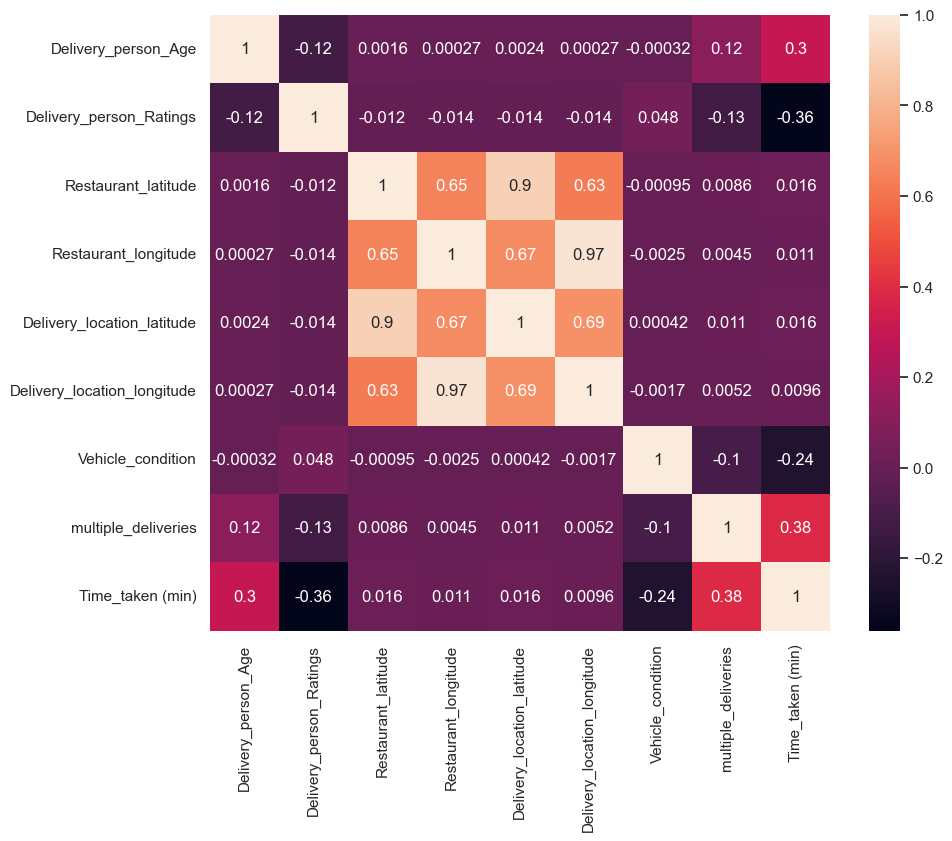

In [22]:
## Plotting HEATMAP to see the correlation between numerical_columns and target_variable:

sns.set(rc={"figure.figsize": (10, 8)})
sns.heatmap(df[num_features_with_timetaken].corr(), annot=True)

<Axes: xlabel='multiple_deliveries', ylabel='Time_taken (min)'>

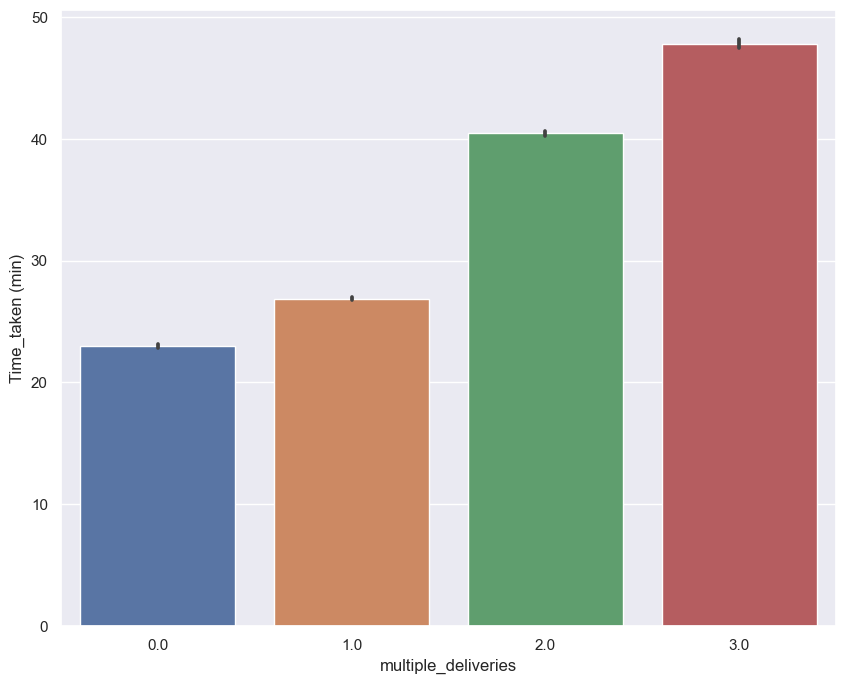

In [23]:
sns.barplot(data=df, x="multiple_deliveries", y="Time_taken (min)")

In [24]:
df["multiple_deliveries"].dtype

dtype('float64')

In [25]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [26]:
categorical_columns

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

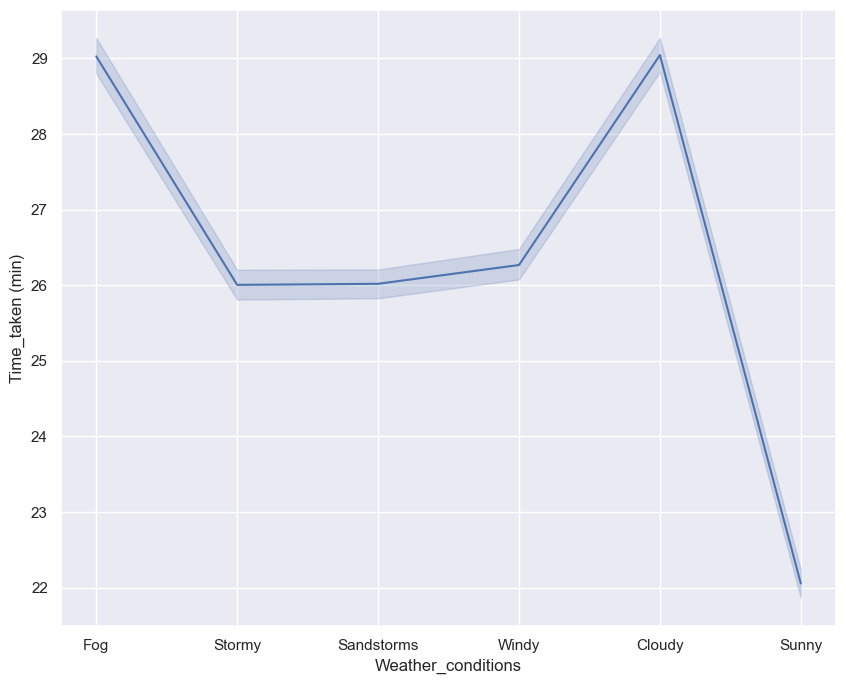

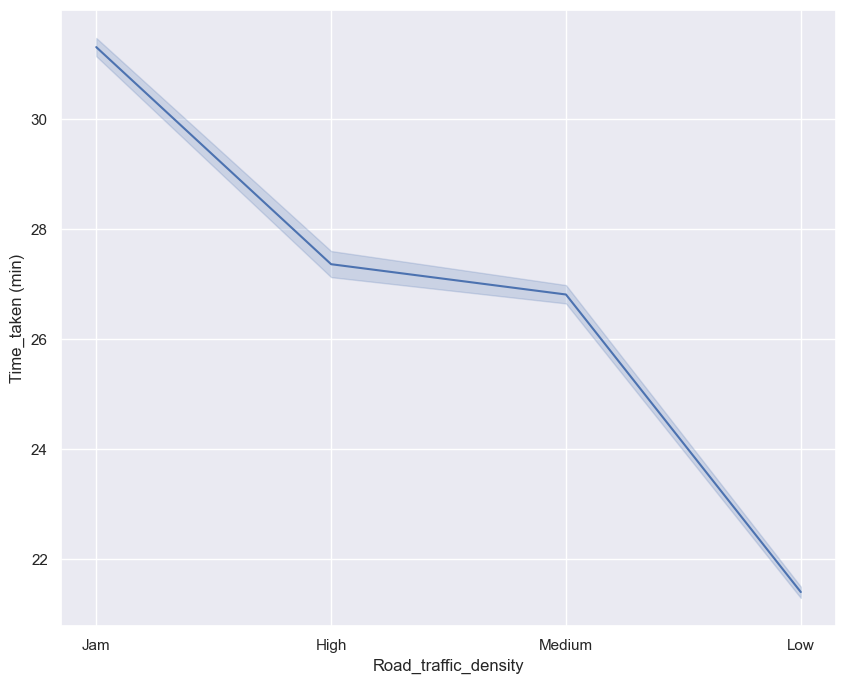

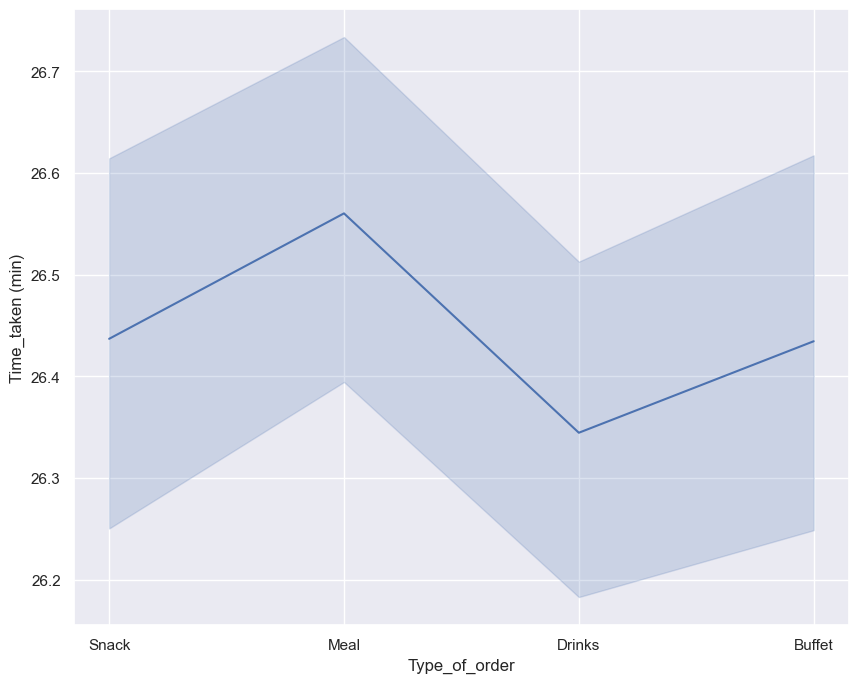

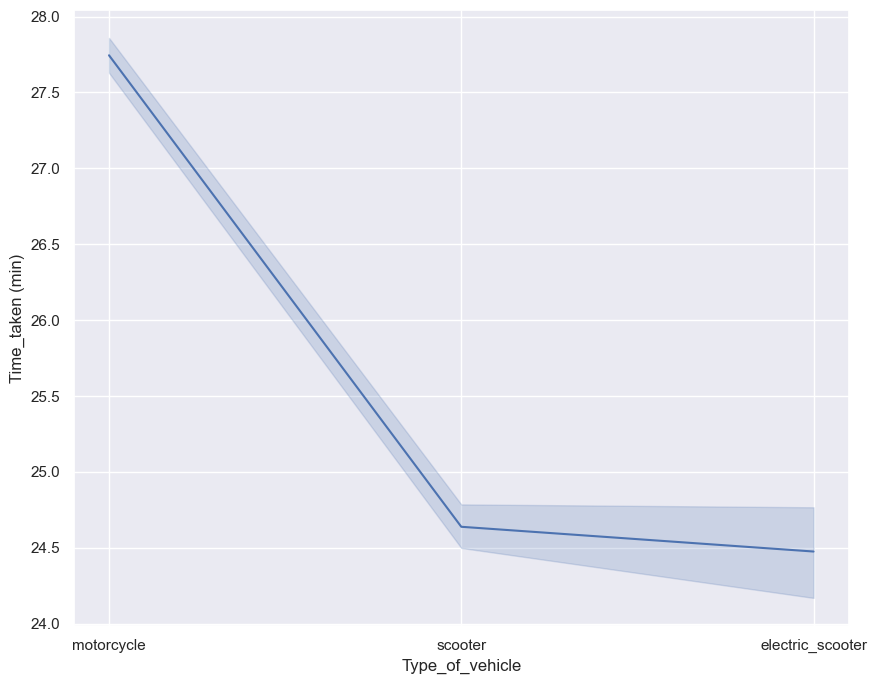

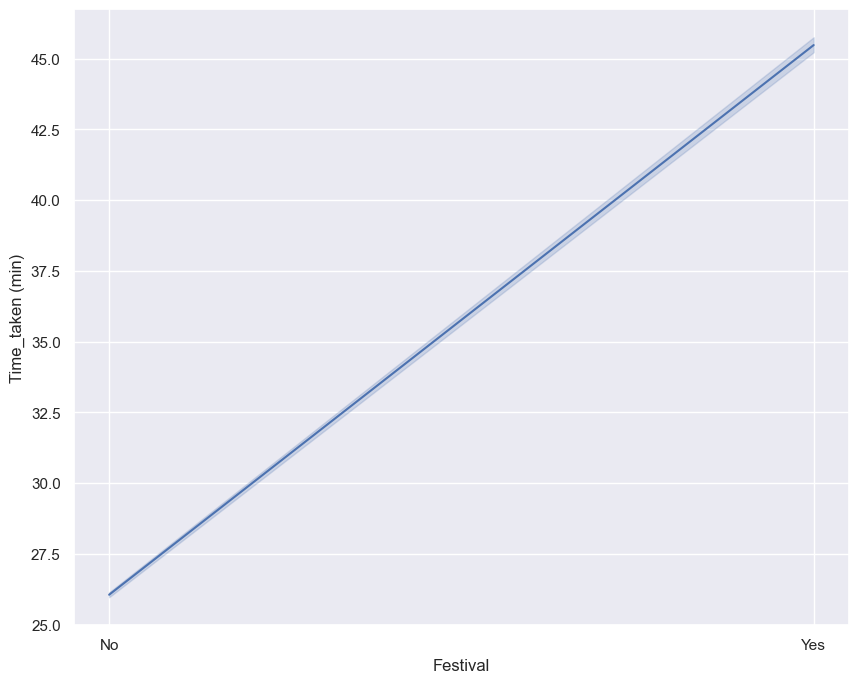

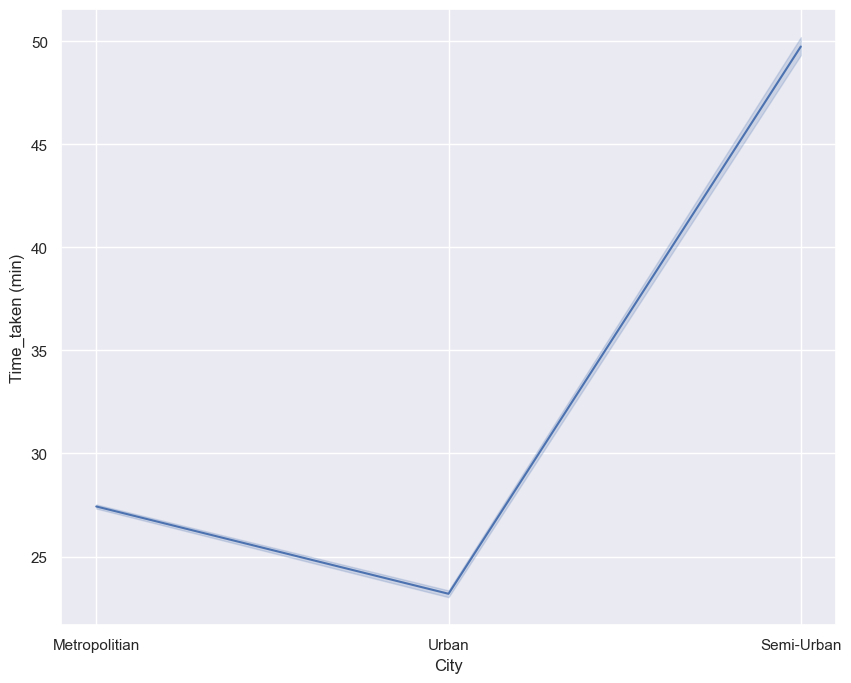

In [27]:
for columns in categorical_columns:
    sns.lineplot(x=columns, y=df['Time_taken (min)'], data=df)
    plt.show()

In [28]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [29]:
df['multiple_deliveries'].unique()

## Checking all the unique ratings available in Delivery_person_Ratings. 

array([3., 1., 0., 2.])

In [30]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

## Model Training

In [31]:
## Feature engineering
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
## Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Train Test Split
from sklearn.model_selection import train_test_split
## Model Training
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
## Numerical pipeline

num_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
           ('scaler', StandardScaler())
           ]
)

## Categorical pipeline

cat_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
           ('One_Hot_Encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
           ('scaler', StandardScaler())
           ]
)

## This is to define which column will be processed by each pipeline. 
## Both the pipelines are being merged to one object so that it can be used to preprocess both numerical and categorical data simultaneously. 

preprocessor = ColumnTransformer([
('num_pipeline', num_pipeline, numerical_columns),
('cat_pipeline', cat_pipeline, categorical_columns)
])

In [33]:
categorical_columns

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [34]:
categorical_columns

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [35]:
numerical_columns

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries']

In [36]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Delivery_person_Age',
                                  'Delivery_person_Ratings',
                                  'Restaurant_latitude', 'Restaurant_longitude',
                                  'Delivery_location_latitude',
                                  'Delivery_location_longitude',
                                  'Vehicle_condition', 'multiple_deliveries']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('One_Hot_Encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 ['Weather_conditions', 'Road_traffic_density',
                                  'Type_of_order', 'Type_of_vehicle',
                                  'Festival', 'City'])])

In [37]:
## Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=30)

In [38]:
X_train.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
13131,24.0,4.6,13.091809,80.219104,13.151809,80.279104,Fog,Low,0,Meal,motorcycle,1.0,No,Metropolitian
43567,30.0,4.7,18.530963,73.828972,18.540963,73.838972,Sandstorms,High,2,Buffet,motorcycle,1.0,No,Urban
33120,25.0,4.6,11.006686,76.951736,11.086686,77.031736,Stormy,Medium,2,Meal,scooter,0.0,No,Urban
33703,35.0,4.6,12.284747,76.625861,12.314747,76.655861,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
10076,25.0,4.9,11.001852,76.976268,11.081852,77.056268,Fog,Low,2,Buffet,electric_scooter,1.0,No,Urban


In [39]:
X_test.shape

(13133, 14)

In [40]:
X_train= pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

d:\Ineuron\Machine_Learning\Delivery_time_Prediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
df['Weather_conditions'].dtype

dtype('O')

In [42]:
X_train.head(10)

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,cat_pipeline__Weather_conditions_Cloudy,cat_pipeline__Weather_conditions_Fog,...,cat_pipeline__Type_of_order_Meal,cat_pipeline__Type_of_order_Snack,cat_pipeline__Type_of_vehicle_electric_scooter,cat_pipeline__Type_of_vehicle_motorcycle,cat_pipeline__Type_of_vehicle_scooter,cat_pipeline__Festival_No,cat_pipeline__Festival_Yes,cat_pipeline__City_Metropolitian,cat_pipeline__City_Semi-Urban,cat_pipeline__City_Urban
0,-0.985384,-0.117624,-0.507718,0.443076,-0.587776,0.447222,-1.226536,0.445617,-0.450843,2.210620,...,1.741486,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,0.539763,-0.060569,-0.534113
1,0.070659,0.205354,0.175777,0.149695,0.146029,0.142366,1.225016,0.445617,-0.450843,-0.452362,...,-0.574222,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,-1.852667,-0.060569,1.872262
2,-0.809377,-0.117624,-0.769739,0.293066,-0.868970,0.293502,1.225016,-1.307163,-0.450843,-0.452362,...,1.741486,-0.585227,-0.297668,-1.185370,1.410862,0.144652,-0.144652,-1.852667,-0.060569,1.872262
3,0.950695,-0.117624,-0.609135,0.278105,-0.701754,0.275709,-0.000760,0.445617,-0.450843,2.210620,...,1.741486,-0.585227,-0.297668,-1.185370,1.410862,0.144652,-0.144652,0.539763,-0.060569,-0.534113
4,-0.809377,0.851309,-0.770346,0.294192,-0.869629,0.294663,1.225016,0.445617,-0.450843,2.210620,...,-0.574222,-0.585227,3.359447,-1.185370,-0.708786,0.144652,-0.144652,-1.852667,-0.060569,1.872262
5,-1.513405,-0.117624,-0.901626,0.262996,-1.014603,0.261552,1.225016,-1.307163,2.218067,-0.452362,...,1.741486,-0.585227,-0.297668,-1.185370,1.410862,0.144652,-0.144652,-1.852667,-0.060569,1.872262
6,-0.105348,-0.117624,1.228737,0.239408,1.293790,0.237231,-0.000760,0.445617,-0.450843,-0.452362,...,1.741486,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,0.539763,-0.060569,-0.534113
7,-1.161391,-1.086556,1.228877,0.239685,1.288495,0.235623,-0.000760,0.445617,2.218067,-0.452362,...,-0.574222,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,0.539763,-0.060569,-0.534113
8,-1.513405,0.528331,-2.152861,-3.239903,-2.366316,-3.348682,-1.226536,0.445617,-0.450843,-0.452362,...,-0.574222,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,0.539763,-0.060569,-0.534113
9,-0.633370,0.205354,1.228946,0.240063,1.298102,0.239327,-1.226536,0.445617,-0.450843,2.210620,...,-0.574222,1.708739,-0.297668,0.843618,-0.708786,0.144652,-0.144652,-1.852667,-0.060569,1.872262


In [43]:
X_test.head(2)

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,cat_pipeline__Weather_conditions_Cloudy,cat_pipeline__Weather_conditions_Fog,...,cat_pipeline__Type_of_order_Meal,cat_pipeline__Type_of_order_Snack,cat_pipeline__Type_of_vehicle_electric_scooter,cat_pipeline__Type_of_vehicle_motorcycle,cat_pipeline__Type_of_vehicle_scooter,cat_pipeline__Festival_No,cat_pipeline__Festival_Yes,cat_pipeline__City_Metropolitian,cat_pipeline__City_Semi-Urban,cat_pipeline__City_Urban
0,0.070659,-1.409533,-0.522984,0.324929,-0.611126,0.323041,-0.00076,0.445617,2.218067,-0.452362,...,1.741486,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,0.539763,-0.060569,-0.534113
1,-1.161391,0.205354,0.650725,0.119484,0.666113,0.113110,-0.00076,0.445617,-0.450843,2.210620,...,1.741486,-0.585227,-0.297668,0.843618,-0.708786,0.144652,-0.144652,0.539763,-0.060569,-0.534113


In [44]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mse, mae, rmse, r2_square

In [45]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mse, mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",np.round(r2_square*100, 2))

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
MSE: 38.38971291949251
RMSE: 6.195943263095016
MAE: 4.907237935106031
R2 score 56.38


Lasso
Model Training Performance
MSE: 46.82965629342244
RMSE: 6.843219731487689
MAE: 5.423437446389726
R2 score 46.79


Ridge
Model Training Performance
MSE: 38.369488027255315
RMSE: 6.194310940472339
MAE: 4.907020434149984
R2 score 56.4


Elasticnet
Model Training Performance
MSE: 45.9112809111268
RMSE: 6.77578636846874
MAE: 5.408633294813942
R2 score 47.83




In [46]:
## This is to check the accuracy of the Training data

reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

# use the model to make predictions on new data
y_train_pred = reg.predict(X_train)

np.round(reg.score(X_train, y_train)*100, 2)


56.23

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43774 entries, 0 to 45583
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          42496 non-null  float64
 1   Delivery_person_Ratings      42444 non-null  float64
 2   Restaurant_latitude          43774 non-null  float64
 3   Restaurant_longitude         43774 non-null  float64
 4   Delivery_location_latitude   43774 non-null  float64
 5   Delivery_location_longitude  43774 non-null  float64
 6   Weather_conditions           43774 non-null  object 
 7   Road_traffic_density         43774 non-null  object 
 8   Vehicle_condition            43774 non-null  int64  
 9   Type_of_order                43774 non-null  object 
 10  Type_of_vehicle              43774 non-null  object 
 11  multiple_deliveries          43774 non-null  float64
 12  Festival                     43774 non-null  object 
 13  City                 

In [48]:
df['Vehicle_condition'].unique()

array([2, 1, 0], dtype=int64)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   num_pipeline__Delivery_person_Age               30641 non-null  float64
 1   num_pipeline__Delivery_person_Ratings           30641 non-null  float64
 2   num_pipeline__Restaurant_latitude               30641 non-null  float64
 3   num_pipeline__Restaurant_longitude              30641 non-null  float64
 4   num_pipeline__Delivery_location_latitude        30641 non-null  float64
 5   num_pipeline__Delivery_location_longitude       30641 non-null  float64
 6   num_pipeline__Vehicle_condition                 30641 non-null  float64
 7   num_pipeline__multiple_deliveries               30641 non-null  float64
 8   cat_pipeline__Weather_conditions_Cloudy         30641 non-null  float64
 9   cat_pipeline__Weather_conditions_Fog   